In [179]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [180]:
file_loc = 'SPY_5min_2022-01-03T09.00.00_2022-03-25T14.10.00.csv'
df = pd.read_csv(os.path.join('data',file_loc),parse_dates=['datetime'])
df.head()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions
0,2022-01-03 09:00:00,9426.0,476.6581,476.38,476.56,476.92,476.38,1641200400000,115
1,2022-01-03 09:05:00,1778.0,476.4585,476.48,476.44,476.49,476.44,1641200700000,37
2,2022-01-03 09:10:00,9767.0,476.7624,476.62,476.83,476.87,476.58,1641201000000,80
3,2022-01-03 09:15:00,1743.0,476.7269,476.84,476.53,476.84,476.53,1641201300000,44
4,2022-01-03 09:20:00,1037.0,476.7011,476.65,476.82,476.82,476.62,1641201600000,21


In [184]:
def rsi(series):
    diff = series.diff()
    ups = np.where(diff>0,diff,0).mean()
    downs = -np.where(diff<=0,diff,0).mean()
    
    #print(ups,downs)
    rs = ups/downs
    rsi = 100-100/(1+rs)
    return rsi

df['rsi'] = df['close'].rolling(100).apply(lambda x: rsi(x))

In [185]:
df['time-delta'] = df['datetime'].diff().dt.seconds
for col in ['close']:
    df[f'{col}_diff'] = df[col].pct_change()
df.head()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,time-delta,close_diff,date,rsi
0,2022-01-03 09:00:00,9426.0,476.6581,476.38,476.56,476.92,476.38,1641200400000,115,NaN,NaN,2022-01-03,NaN
1,2022-01-03 09:05:00,1778.0,476.4585,476.48,476.44,476.49,476.44,1641200700000,37,300.0,-0.000252,2022-01-03,NaN
2,2022-01-03 09:10:00,9767.0,476.7624,476.62,476.83,476.87,476.58,1641201000000,80,300.0,0.000819,2022-01-03,NaN
3,2022-01-03 09:15:00,1743.0,476.7269,476.84,476.53,476.84,476.53,1641201300000,44,300.0,-0.000629,2022-01-03,NaN
4,2022-01-03 09:20:00,1037.0,476.7011,476.65,476.82,476.82,476.62,1641201600000,21,300.0,0.000609,2022-01-03,NaN


In [186]:
df['date'] = df['datetime'].dt.date
df.head()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,time-delta,close_diff,date,rsi
0,2022-01-03 09:00:00,9426.0,476.6581,476.38,476.56,476.92,476.38,1641200400000,115,NaN,NaN,2022-01-03,NaN
1,2022-01-03 09:05:00,1778.0,476.4585,476.48,476.44,476.49,476.44,1641200700000,37,300.0,-0.000252,2022-01-03,NaN
2,2022-01-03 09:10:00,9767.0,476.7624,476.62,476.83,476.87,476.58,1641201000000,80,300.0,0.000819,2022-01-03,NaN
3,2022-01-03 09:15:00,1743.0,476.7269,476.84,476.53,476.84,476.53,1641201300000,44,300.0,-0.000629,2022-01-03,NaN
4,2022-01-03 09:20:00,1037.0,476.7011,476.65,476.82,476.82,476.62,1641201600000,21,300.0,0.000609,2022-01-03,NaN


In [187]:
df.groupby('date')['close'].agg(['min','max'])

,min,max
date,,
2022-01-03,474.550,478.06
2022-01-04,475.720,479.84
2022-01-05,467.660,477.83
2022-01-06,466.090,470.67
2022-01-07,465.000,469.65
...,...,...
2022-03-21,440.770,446.26
2022-03-22,444.930,450.26
2022-03-23,443.730,449.30


In [188]:
min_max = df.groupby('date')['close'].agg(['min','max']).shift(1).reset_index().rename(columns={'min':'previous_day_min',
                                                                                                'max':'previous_day_max'})
open_value = df.groupby('date')['open'].first().to_frame(name='open_price').reset_index()
#df = df.merge(open_value,on='date')
df = df.merge(min_max,on='date')
df['previous_day_max_ratio'] = df['close']/df['previous_day_max']
df['previous_day_min_ratio'] = df['close']/df['previous_day_min']
df

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,time-delta,close_diff,date,rsi,previous_day_min,previous_day_max,previous_day_max_ratio,previous_day_min_ratio
0,2022-01-03 09:00:00,9426.0,476.6581,476.3800,476.5600,476.9200,476.38,1641200400000,115,NaN,NaN,2022-01-03,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 09:05:00,1778.0,476.4585,476.4800,476.4400,476.4900,476.44,1641200700000,37,300.0,-0.000252,2022-01-03,NaN,NaN,NaN,NaN,NaN
2,2022-01-03 09:10:00,9767.0,476.7624,476.6200,476.8300,476.8700,476.58,1641201000000,80,300.0,0.000819,2022-01-03,NaN,NaN,NaN,NaN,NaN
3,2022-01-03 09:15:00,1743.0,476.7269,476.8400,476.5300,476.8400,476.53,1641201300000,44,300.0,-0.000629,2022-01-03,NaN,NaN,NaN,NaN,NaN
4,2022-01-03 09:20:00,1037.0,476.7011,476.6500,476.8200,476.8200,476.62,1641201600000,21,300.0,0.000609,2022-01-03,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10960,2022-03-25 13:50:00,768843.0,451.3734,451.3881,451.4900,451.6300,451.10,1648216200000,10940,300.0,0.000222,2022-03-25,53.101784,445.125,450.78,1.001575,1.014299
10961,2022-03-25 13:55:00,654224.0,451.0207,451.5100,450.8601,451.5400,450.64,1648216500000,8177,300.0,-0.001395,2022-03-25,50.650740,445.125,450.78,1.000178,1.012884
10962,2022-03-25 14:00:00,657433.0,450.7049,450.8800,450.8000,451.0300,450.45,1648216800000,8871,300.0,-0.000133,2022-03-25,50.650374,445.125,450.78,1.000044,1.012749
10963,2022-03-25 14:05:00,507110.0,450.9019,450.7901,451.1650,451.2400,450.64,1648217100000,7328,300.0,0.000810,2022-03-25,51.918582,445.125,450.78,1.000854,1.013569


In [189]:
df = df[500:].reset_index(drop=True)

In [190]:
df.shape

(10465, 17)

<AxesSubplot:xlabel='datetime'>

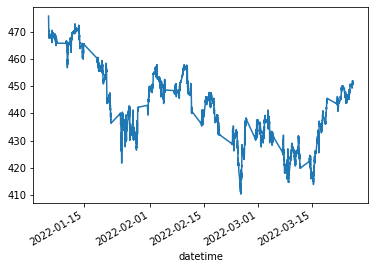

In [191]:
df.set_index('datetime')['close'].plot()

In [192]:
df.head(7)

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,time-delta,close_diff,date,rsi,previous_day_min,previous_day_max,previous_day_max_ratio,previous_day_min_ratio
0,2022-01-05 18:40:00,296642.0,475.9565,475.91,475.88,476.11,475.841,1641408000000,3897,300.0,-0.000063,2022-01-05,43.987138,475.72,479.84,0.991747,1.000336
1,2022-01-05 18:45:00,1085457.0,477.0310,475.88,475.68,476.02,475.590,1641408300000,4330,300.0,-0.000420,2022-01-05,43.846154,475.72,479.84,0.991330,0.999916
2,2022-01-05 18:50:00,589527.0,476.5195,475.68,475.76,475.85,475.630,1641408600000,4153,300.0,0.000168,2022-01-05,44.302177,475.72,479.84,0.991497,1.000084
3,2022-01-05 18:55:00,428899.0,475.8023,475.78,475.85,475.92,475.650,1641408900000,3813,300.0,0.000189,2022-01-05,45.167526,475.72,479.84,0.991685,1.000273
4,2022-01-05 19:00:00,2228010.0,475.9024,475.84,475.27,476.91,475.220,1641409200000,31790,300.0,-0.001219,2022-01-05,43.364486,475.72,479.84,0.990476,0.999054
5,2022-01-05 19:05:00,2435466.0,475.3168,475.24,474.69,475.49,474.520,1641409500000,28890,300.0,-0.001220,2022-01-05,42.028986,475.72,479.84,0.989267,0.997835
6,2022-01-05 19:10:00,1779602.0,474.0808,474.71,473.91,474.74,473.550,1641409800000,16863,300.0,-0.001643,2022-01-05,39.510490,475.72,479.84,0.987642,0.996195


In [193]:
from pandas.api.types import is_numeric_dtype

for x in df:
    if is_numeric_dtype(df[x]):
        df[x] = df[x].astype('float32')

In [194]:
df.isna().mean()

datetime                  0.0
volume                    0.0
volume_weighted           0.0
open                      0.0
close                     0.0
high                      0.0
low                       0.0
timestamp                 0.0
no_transactions           0.0
time-delta                0.0
close_diff                0.0
date                      0.0
rsi                       0.0
previous_day_min          0.0
previous_day_max          0.0
previous_day_max_ratio    0.0
previous_day_min_ratio    0.0
dtype: float64

In [195]:
df['outcome'] = df['close'][::-1].pct_change(6)[::-1]

In [196]:
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    df[f'close_growth_{i}'] = df['close'].pct_change(i)

<AxesSubplot:>

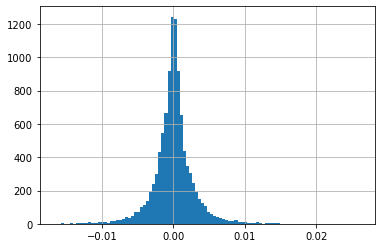

In [197]:
df['outcome'].hist(bins=100)

In [198]:
df = df.replace(np.inf,np.nan).replace(-np.inf,np.nan).dropna(axis=0)

In [199]:
df.shape

(10442, 34)

In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def calc_perf(df_,variable,target):
    df = df_.copy()
    reg = RandomForestRegressor(min_samples_leaf=100)
    df=  df[~df[variable].isna()]
    X,y = df[[variable]].values,df[target].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    reg.fit(X_train,y_train)
    y_pred_train = reg.predict(X_train)
    error = mean_squared_error(y_train,y_pred_train)
    return error

calc_perf(df,'previous_day_min_ratio','outcome')

7.418901051129244e-06

<AxesSubplot:>

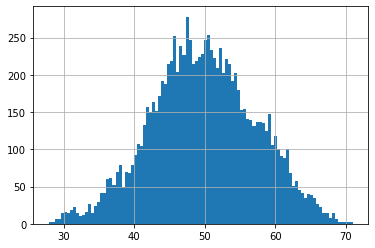

In [210]:
df['rsi'].hist(bins=100)

In [201]:
df.columns.tolist()

['datetime',
 'volume',
 'volume_weighted',
 'open',
 'close',
 'high',
 'low',
 'timestamp',
 'no_transactions',
 'time-delta',
 'close_diff',
 'date',
 'rsi',
 'previous_day_min',
 'previous_day_max',
 'previous_day_max_ratio',
 'previous_day_min_ratio',
 'outcome',
 'close_growth_2',
 'close_growth_3',
 'close_growth_4',
 'close_growth_5',
 'close_growth_6',
 'close_growth_7',
 'close_growth_8',
 'close_growth_9',
 'close_growth_10',
 'close_growth_11',
 'close_growth_12',
 'close_growth_13',
 'close_growth_14',
 'close_growth_15',
 'close_growth_16',
 'close_growth_17']

In [215]:
import tqdm

mse = dict()
for variable in tqdm.tqdm([
    'rsi',
 'previous_day_max_ratio',
 'previous_day_min_ratio',
 'close_growth_2',
 'close_growth_3',
 'close_growth_4',
 'close_growth_5',
 'close_growth_6',
 'close_growth_7',
 'close_growth_8',
 'close_growth_9',
 'close_growth_10',
 'close_growth_11',
 'close_growth_12',
 'close_growth_13',
 'close_growth_14',
 'close_growth_15',
 'close_growth_16',
 'close_growth_17']):
    mse[variable] = calc_perf(df,variable,'outcome')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:08<00:00,  2.20it/s]


(7.4e-06, 7.5e-06)

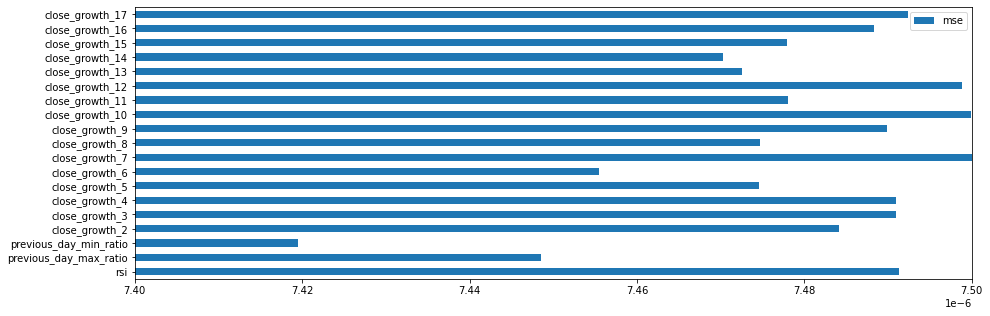

In [216]:
pd.DataFrame(mse,index=['mse']).T.plot.barh(figsize=[15,5])
plt.xlim(7.4e-6,7.5e-6)

<AxesSubplot:>

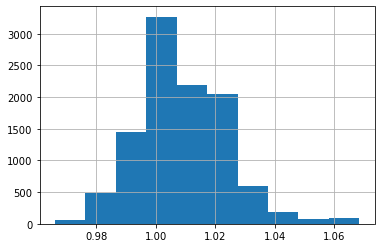

In [217]:
df['previous_day_min_ratio'].hist()

In [207]:
df[df['previous_day_min_ratio']>1.0]['outcome'].mean()

7.208318129414693e-05

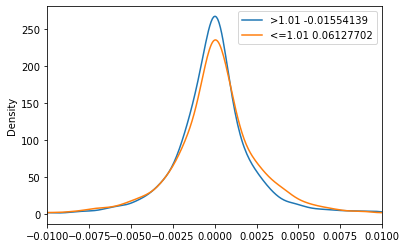

In [224]:
mean_1 = df[df['previous_day_min_ratio']>1.01]['outcome'].mean()/10e-4
mean_2 = df[df['previous_day_min_ratio']<=1.01]['outcome'].mean()/10e-4
axes = df[df['previous_day_min_ratio']>1.01]['outcome'].plot.density(label=f'>1.01 {mean_1:0.8f}')
df[df['previous_day_min_ratio']<=1.01]['outcome'].plot.density(ax=axes,label=f'<=1.01 {mean_2:0.8f}')
plt.legend()
plt.xlim(-0.01,0.01)
plt.show()

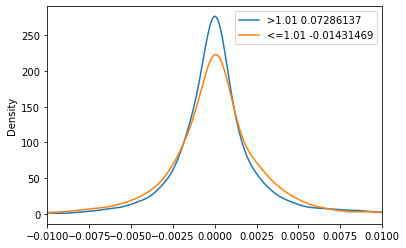

In [225]:
mean_1 = df[df['rsi']>50]['outcome'].mean()/10e-4
mean_2 = df[df['rsi']<=50]['outcome'].mean()/10e-4
axes = df[df['rsi']>50]['outcome'].plot.density(label=f'>1.01 {mean_1:0.8f}')
df[df['rsi']<=50]['outcome'].plot.density(ax=axes,label=f'<=1.01 {mean_2:0.8f}')
plt.legend()
plt.xlim(-0.01,0.01)
plt.show()

In [212]:
df[df['rsi']<=0.5]

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,time-delta,...,close_growth_8,close_growth_9,close_growth_10,close_growth_11,close_growth_12,close_growth_13,close_growth_14,close_growth_15,close_growth_16,close_growth_17


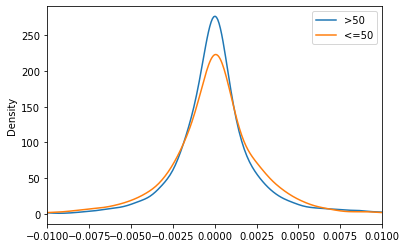

In [214]:
axes = df[df['rsi']>50]['outcome'].plot.density(label='>50')
df[df['rsi']<=50]['outcome'].plot.density(ax=axes,label='<=50')
plt.legend()
plt.xlim(-0.01,0.01)
plt.show()

In [164]:
df[df['previous_day_min_ratio']<1.0]['outcome'].mean()

-9.033794776769355e-05

<AxesSubplot:>

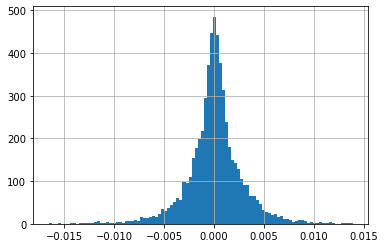

In [169]:
df[df['previous_day_min_ratio']<1.01]['outcome'].hist(bins=100)

In [75]:
# bins = [-np.inf]+np.arange(-0.01,0.01,0.002).tolist()+[np.inf]
# df['outcome_bin'] = pd.cut(df['outcome'],bins)
# df.groupby('outcome_bin')['outcome'].count().sum()

# baseline = (df.groupby('outcome_bin')['outcome'].count()/10459).to_frame(name='baseline')

# def calc_distribution(df,variable):
#     baseline_bins = [-np.inf]+np.arange(-0.01,0.01,0.002).tolist()+[np.inf]
#     df['new_bins'] = pd.cut(df[variable],bins=baseline_bins)
#     new = df.groupby('new_bins')['outcome'].count().to_frame(name='new')
#     return baseline.join(new).fillna(0)

# calc_distribution(df,'previous_day_min_ratio',variable_bins)

In [ ]:
def calc_distribution(x):

In [36]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


values1 = [1.346112,1.337432,1.246655]
values2 = [1.346112,1.337432,1.246655]

print(KL(values1, values2))

0.0


C:\Users\cemly\AppData\Local\Temp/ipykernel_19508/3870850906.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
C:\Users\cemly\AppData\Local\Temp/ipykernel_19508/3870850906.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [31]:
df[df[]]['outcome']

1.0041569074296808

In [32]:
473.91/475.88

0.9958603009161974

In [11]:
# Window of data we're working with
N = df.shape[0]
print(f'{N} ticks found')

# 2 hour lookback period
LOOKBACK = 2*(60/5)

# Growth requirement
GROWTH_LIMIT = 0.005

# outcome period 30min
HORIZON = 6

X = list()
y = list()
growth = list()

t =1
finish = False
counter = 0
while finish is False:
    
    counter+=1
    print(f'Counter:{counter}',end='\r')
    
    # check we have enough lookback data
    if t<22:
        t+=1
        continue
    
    # check we don't have enough data left then end the cycle
    if (N - t)<5:
        finish = True
        t+=1
        continue
        
    lookback_data = df.loc[t-20:t,['volume','close','open','high','low','previous_day_max_ratio','previous_day_min_ratio']].values
    lookback_data = lookback_data/lookback_data[-1]
    outcome_data = df.loc[t+1:t+6,'close_diff'].sum()>GROWTH_LIMIT
    growth_data = df.loc[t+1:t+6,'close_diff'].sum()
    
    X.append(lookback_data)
    y.append(outcome_data)
    growth.append(growth_data)
    
    t+=1

10465 ticks found


In [14]:
y = np.array(y).reshape(-1,1)
y.shape

(10439, 1)

In [15]:
growth = np.array(growth).reshape(-1,1)
growth.shape

(10439, 1)

In [16]:
growth_train = growth[:6000]
growth_test = growth[6000:]

In [17]:
X = np.stack(X)
X.shape

(10439, 21, 7)

In [18]:
X_train = X[:6000]
X_test = X[6000:]

y_train = y[:6000]
y_test = y[6000:]

with open('./data/X_train_2.npy','wb') as f:
    np.save(f,X_train)
    
with open('./data/X_test_2.npy','wb') as f:
    np.save(f,X_test)
    
with open('./data/y_train_2.npy','wb') as f:
    np.save(f,y_train)
    
with open('./data/y_test_2.npy','wb') as f:
    np.save(f,X_test)

# Defining a simple CNN

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [110]:
model = keras.Sequential([
    keras.layers.Conv1D(36,2,
                        activation='sigmoid',
                        input_shape=(X_train.shape[1],X_train.shape[2]),
                        kernel_regularizer=tf.keras.regularizers.l2(l=.05)),
    #keras.layers.Conv1D(3,3,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(2),
    #keras.layers.Conv1D(6,2,activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.MaxPooling1D(2),    
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [111]:
metrics = [
    tf.metrics.AUC(name='auc')
]

#odel.compile(optimizer=keras.optimizers.Adam(1e-4),loss='binary_crossentropy',metrics=metrics)
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='binary_crossentropy',metrics=metrics)

In [112]:
callbacks = [keras.callbacks.EarlyStopping(patience=500,restore_best_weights=True)]

In [113]:
history = model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test))

Epoch 1/200
120/120 - 1s - loss: 1.0790 - auc: 0.4544 - val_loss: 0.9391 - val_auc: 0.4503 - 1s/epoch - 10ms/step
Epoch 2/200
120/120 - 0s - loss: 0.8483 - auc: 0.5012 - val_loss: 0.7739 - val_auc: 0.5341 - 366ms/epoch - 3ms/step
Epoch 3/200
120/120 - 0s - loss: 0.7101 - auc: 0.5788 - val_loss: 0.6701 - val_auc: 0.5671 - 333ms/epoch - 3ms/step
Epoch 4/200
120/120 - 0s - loss: 0.6168 - auc: 0.6057 - val_loss: 0.5903 - val_auc: 0.5795 - 315ms/epoch - 3ms/step
Epoch 5/200
120/120 - 0s - loss: 0.5453 - auc: 0.6416 - val_loss: 0.5278 - val_auc: 0.5840 - 325ms/epoch - 3ms/step
Epoch 6/200
120/120 - 0s - loss: 0.4884 - auc: 0.6326 - val_loss: 0.4764 - val_auc: 0.5906 - 331ms/epoch - 3ms/step
Epoch 7/200
120/120 - 0s - loss: 0.4411 - auc: 0.6545 - val_loss: 0.4336 - val_auc: 0.5919 - 313ms/epoch - 3ms/step
Epoch 8/200
120/120 - 0s - loss: 0.4006 - auc: 0.6397 - val_loss: 0.3964 - val_auc: 0.5935 - 307ms/epoch - 3ms/step
Epoch 9/200
120/120 - 0s - loss: 0.3654 - auc: 0.6441 - val_loss: 0.3643 -

Epoch 72/200
120/120 - 0s - loss: 0.1396 - auc: 0.6737 - val_loss: 0.1597 - val_auc: 0.6559 - 307ms/epoch - 3ms/step
Epoch 73/200
120/120 - 0s - loss: 0.1400 - auc: 0.6603 - val_loss: 0.1604 - val_auc: 0.6587 - 309ms/epoch - 3ms/step
Epoch 74/200
120/120 - 0s - loss: 0.1400 - auc: 0.6530 - val_loss: 0.1605 - val_auc: 0.6580 - 320ms/epoch - 3ms/step
Epoch 75/200
120/120 - 0s - loss: 0.1396 - auc: 0.6681 - val_loss: 0.1598 - val_auc: 0.6534 - 321ms/epoch - 3ms/step
Epoch 76/200
120/120 - 0s - loss: 0.1400 - auc: 0.6478 - val_loss: 0.1596 - val_auc: 0.6607 - 314ms/epoch - 3ms/step
Epoch 77/200
120/120 - 0s - loss: 0.1400 - auc: 0.6493 - val_loss: 0.1599 - val_auc: 0.6543 - 320ms/epoch - 3ms/step
Epoch 78/200
120/120 - 0s - loss: 0.1394 - auc: 0.6643 - val_loss: 0.1598 - val_auc: 0.6574 - 303ms/epoch - 3ms/step
Epoch 79/200
120/120 - 0s - loss: 0.1398 - auc: 0.6603 - val_loss: 0.1601 - val_auc: 0.6624 - 312ms/epoch - 3ms/step
Epoch 80/200
120/120 - 0s - loss: 0.1392 - auc: 0.6724 - val_los

Epoch 142/200
120/120 - 0s - loss: 0.1381 - auc: 0.6764 - val_loss: 0.1591 - val_auc: 0.6645 - 330ms/epoch - 3ms/step
Epoch 143/200
120/120 - 0s - loss: 0.1371 - auc: 0.6953 - val_loss: 0.1602 - val_auc: 0.6687 - 311ms/epoch - 3ms/step
Epoch 144/200
120/120 - 0s - loss: 0.1383 - auc: 0.6713 - val_loss: 0.1591 - val_auc: 0.6668 - 307ms/epoch - 3ms/step
Epoch 145/200
120/120 - 0s - loss: 0.1375 - auc: 0.6872 - val_loss: 0.1598 - val_auc: 0.6668 - 327ms/epoch - 3ms/step
Epoch 146/200
120/120 - 0s - loss: 0.1380 - auc: 0.6750 - val_loss: 0.1586 - val_auc: 0.6667 - 310ms/epoch - 3ms/step
Epoch 147/200
120/120 - 0s - loss: 0.1378 - auc: 0.6770 - val_loss: 0.1591 - val_auc: 0.6647 - 314ms/epoch - 3ms/step
Epoch 148/200
120/120 - 0s - loss: 0.1376 - auc: 0.6836 - val_loss: 0.1591 - val_auc: 0.6677 - 311ms/epoch - 3ms/step
Epoch 149/200
120/120 - 0s - loss: 0.1380 - auc: 0.6797 - val_loss: 0.1604 - val_auc: 0.6667 - 314ms/epoch - 3ms/step
Epoch 150/200
120/120 - 0s - loss: 0.1371 - auc: 0.6924 

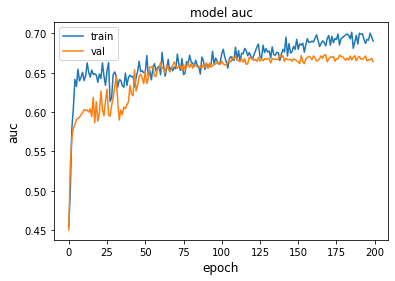

In [115]:
from matplotlib import pyplot as plt
metric = 'auc'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history['val_'+metric])
plt.title('model '+metric)
plt.ylabel(metric,fontsize='large')
plt.xlabel('epoch',fontsize='large')
plt.legend(['train','val'],loc='best')
plt.show()

In [116]:
model.predict(X_test)

139/139 [==============================] - 0s 932us/step


array([[0.01628682],
       [0.01207299],
       [0.02736442],
       ...,
       [0.04647183],
       [0.04643214],
       [0.04836774]], dtype=float32)

In [117]:
from sklearn.metrics import roc_auc_score

2*roc_auc_score(y_test,model.predict(X_test))-1

139/139 [==============================] - 0s 923us/step


0.34663807151694215

In [40]:
model.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model\assets


INFO:tensorflow:Assets written to: cnn_model\assets


Tops out at 0.35....

# Analyzing model performance

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict(X_train))

188/188 [==============================] - 0s 752us/step


188/188 [==============================] - 0s 714us/step


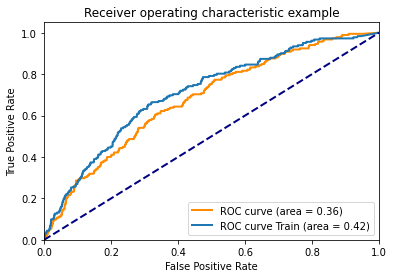

In [21]:
plt.figure()
lw = 2
roc = 2*roc_auc_score(y_test,model.predict(X_test))-1
roc_train = 2*roc_auc_score(y_train,model.predict(X_train))-1

plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc,
)

plt.plot(
    fpr_train,
    tpr_train,
    #color="darkorange",
    lw=lw,
    label="ROC curve Train (area = %0.2f)" % roc_train,
)


plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

155/155 [==============================] - 0s 751us/step


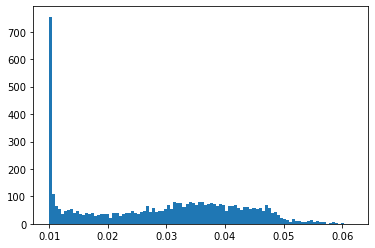

In [22]:
plt.hist(model.predict(X_test),bins=100)
plt.show()

In [23]:
test_pred = model.predict(X_test).ravel()
test_pred

155/155 [==============================] - 0s 842us/step


array([0.03060718, 0.02626335, 0.03055166, ..., 0.04522171, 0.04465409,
       0.04708198], dtype=float32)

<AxesSubplot:xlabel='datetime'>

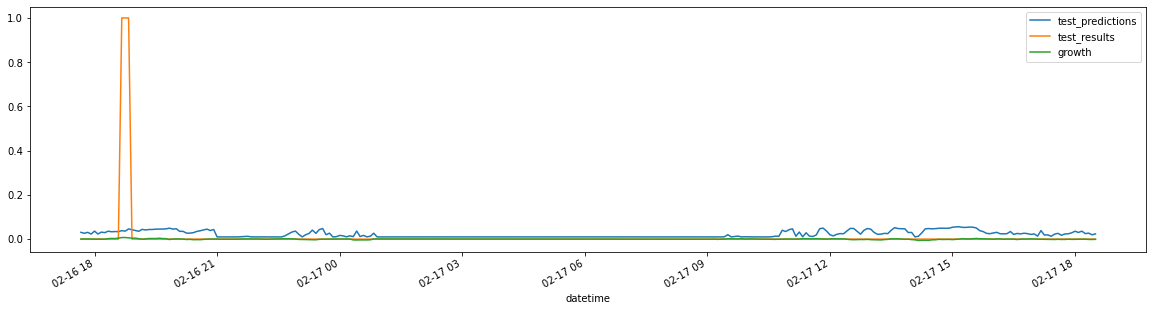

In [24]:
test_pred_df = pd.DataFrame({'test_predictions':test_pred,'test_results':y_test.ravel(),'growth':growth_test.ravel()})
test_datetime_df = df[['datetime']][6020:-6].reset_index(drop=True)
results_df = pd.concat([test_datetime_df,test_pred_df],axis=1).set_index('datetime')
results_df[:200].plot(figsize=[20,5])

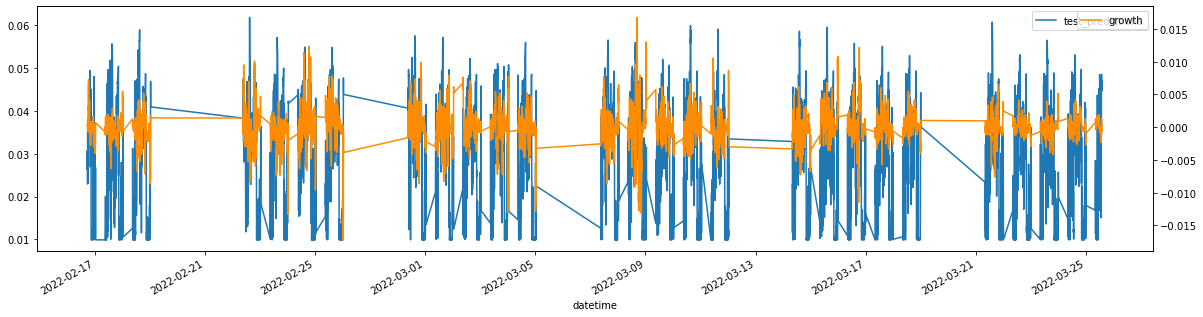

In [25]:
axes = results_df[['test_predictions']].plot(figsize=[20,5])
axes2 = axes.twinx()
results_df[['growth']].plot(ax=axes2,c='darkorange')
#plt.yscale('log')
plt.show()

In [26]:
results_df['test_predictions_bin'] = pd.qcut(results_df['test_predictions'],10)
results_df.groupby('test_predictions_bin')['test_results'].agg(['count','sum','mean'])

,count,sum,mean
test_predictions_bin,,,
"(0.00887, 0.00989]",494,2.0,0.004049
"(0.00989, 0.012]",494,9.0,0.018219
"(0.012, 0.0186]",494,11.0,0.022267
"(0.0186, 0.0257]",494,12.0,0.024291
"(0.0257, 0.0307]",494,14.0,0.028340
"(0.0307, 0.0342]",493,18.0,0.036511
"(0.0342, 0.0377]",494,19.0,0.038462
"(0.0377, 0.0417]",494,26.0,0.052632
"(0.0417, 0.0461]",494,25.0,0.050607


###### running a simulation

In [27]:
results_df.test_predictions>0.01

datetime
2022-02-16 17:40:00    True
2022-02-16 17:45:00    True
2022-02-16 17:50:00    True
2022-02-16 17:55:00    True
2022-02-16 18:00:00    True
                       ... 
2022-03-25 13:20:00    True
2022-03-25 13:25:00    True
2022-03-25 13:30:00    True
2022-03-25 13:35:00    True
2022-03-25 13:40:00    True
Name: test_predictions, Length: 4939, dtype: bool

In [28]:
np.arange(0.0,0.7,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69])

In [29]:
results_df[results_df.test_predictions>0.0].growth.sum()

0.1292404931238622

<AxesSubplot:xlabel='datetime'>

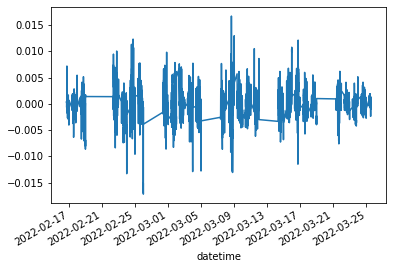

In [30]:
results_df.growth.plot()

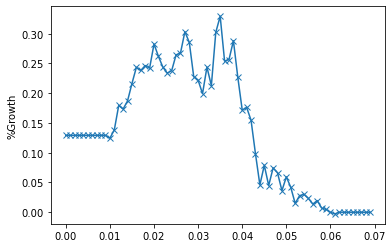

In [31]:
profit = list()
cutoff = list()
for i in np.arange(0.0,0.07,0.001):
    p = results_df[results_df.test_predictions>i].growth.sum()
    profit.append(p)
    cutoff.append(i)
plt.plot(cutoff,profit,marker='x')
plt.ylabel('%Growth')
plt.show()

In [32]:
results_df[results_df.test_predictions>0.001].growth.sum()

0.1292404931238622

If you were to just buy when the model has a prob greater than 0.04 you would get a 5% return, which over 36 days ain't bad.

Of course, this 10% figure will be reduced, and could even be eradicated by fees and spread in the buy sell.

In [33]:
10000*1.05**(15*12)

65173918.409652695

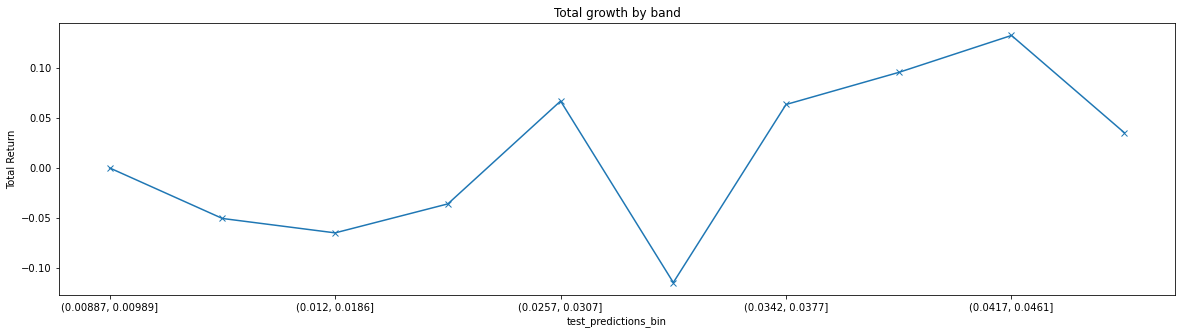

In [34]:
results_df.groupby('test_predictions_bin')['growth'].agg(['count','sum','mean'])['sum'].plot(figsize=[20,5],marker='x')
plt.ylabel('Total Return')
plt.title('Total growth by band')
plt.show()

In [35]:
results_df['test_predictions_bin'] = pd.qcut(results_df['test_predictions'],10)
results_df.groupby('test_predictions_bin')['growth'].agg(['count','sum','mean'])

,count,sum,mean
test_predictions_bin,,,
"(0.00887, 0.00989]",494,0.000138,2.801615e-07
"(0.00989, 0.012]",494,-0.050394,-1.020130e-04
"(0.012, 0.0186]",494,-0.064801,-1.311759e-04
"(0.0186, 0.0257]",494,-0.035805,-7.247886e-05
"(0.0257, 0.0307]",494,0.067073,1.357744e-04
"(0.0307, 0.0342]",493,-0.114478,-2.322067e-04
"(0.0342, 0.0377]",494,0.063613,1.287710e-04
"(0.0377, 0.0417]",494,0.095726,1.937767e-04
"(0.0417, 0.0461]",494,0.132676,2.685746e-04


In [36]:
results_df.index.max()-results_df.index.min()

Timedelta('36 days 20:00:00')

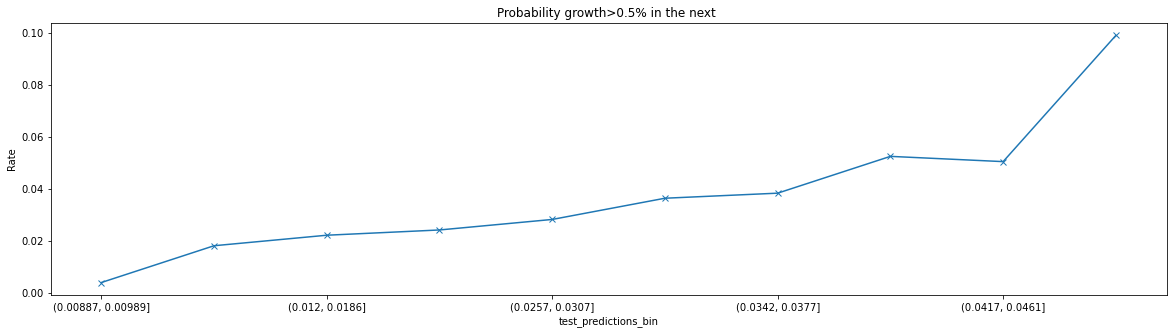

In [37]:
results_df.groupby('test_predictions_bin')['test_results'].agg(['count','sum','mean'])['mean'].plot(figsize=[20,5],marker='x')
plt.ylabel('Rate')
plt.title('Probability growth>0.5% in the next ')
plt.show()

In [38]:
0.005

0.005

Additional features?
- time since opening?
- interday movements

In [39]:
growth_test

array([[ 0.00030514],
       [ 0.00042934],
       [ 0.00051987],
       ...,
       [ 0.00042343],
       [-0.00077431],
       [-0.00099585]])